In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import yfinance as yf

from backtesting import Strategy, Backtest
from backtesting.lib import crossover
from skopt.plots import plot_objective

## Backtesting Strategies
Additional info: https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html

In [17]:
import inspect
import strats, get_data, backtest
from typing import Tuple

In [18]:
stock_obj = get_data.yFinData("SPY")
try:
    ydata = stock_obj.get_ohlcv()
except:
    print('Uable to download data.')

In [29]:
ydata.iloc[-int(float(10)*252):-int(float(1)*252)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-02-25,107.749712,108.511867,107.684150,108.446304,141686900,0.0,0
2011-02-28,108.847888,109.257645,108.487300,109.118317,141585500,0.0,0
2011-03-01,109.462526,109.560863,107.266221,107.298996,258565500,0.0,0
2011-03-02,107.151460,108.028346,106.823660,107.528442,200277400,0.0,0
2011-03-03,108.503653,109.503461,108.495462,109.380539,176480100,0.0,0
...,...,...,...,...,...,...,...
2020-02-25,318.001369,318.659070,305.975943,306.918335,218913200,0.0,0
2020-02-26,308.420321,312.278268,305.004137,305.789459,194773800,0.0,0
2020-02-27,299.860178,305.848357,292.055939,292.055939,284353500,0.0,0


In [21]:
def sim(v, *args):
    print(v, args)

def myFun(*argv):
    c = []
    v = "red"
    for arg in argv:  
        c.append(arg)
    return sim(v, *c)
    
myFun('Hello', 'Welcome', 'to', 'GeeksforGeeks') 

red ('Hello', 'Welcome', 'to', 'GeeksforGeeks')


In [40]:
past10 = ydata.iloc[-int(float(10)*252):-int(float(3)*252)]
bt10 = Backtest(past10, strats.SmaCross, cash=10_000, commission=0.0)

stats, heatmap = bt10.optimize(
    fast=range(10, 100, 10),
    slow=[20, 30, 40],
    constraint=lambda p: p.fast < p.slow,
    maximize='Equity Final [$]',
    max_tries=100,
    random_state=0,
    return_heatmap=True)

In [41]:
heatmap

fast  slow
10    20      14586.038549
      30      14747.592006
      40      15021.178936
20    30      17472.391344
      40      12876.731139
30    40      16342.026165
Name: Equity Final [$], dtype: float64

In [42]:
stats_skopt, heatmap, optimize_result = bt10.optimize(
    fast = [5, 100],
    slow = [10, 200],
    constraint=lambda p: p.fast < p.slow,
    maximize='Sharpe Ratio',
    method='skopt',
    max_tries=100,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

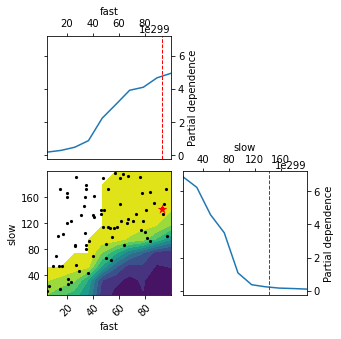

In [43]:
_ = plot_objective(optimize_result, n_points=10)

In [44]:
optimize_result.x

[93, 142]

In [45]:
bt = Backtest(past10, strats.SmaCross, cash=10_000, commission=0.0)
stats = bt.run(fast = 93, slow = 142)
stats

Start                     2011-02-25 00:00:00
End                       2018-02-28 00:00:00
Duration                   2560 days 00:00:00
Exposure Time [%]                     76.3605
Equity Final [$]                        23270
Equity Peak [$]                       24187.2
Return [%]                              132.7
Buy & Hold Return [%]                 136.832
Return (Ann.) [%]                     12.8235
Volatility (Ann.) [%]                 11.7507
Sharpe Ratio                          1.09129
Sortino Ratio                         1.77308
Calmar Ratio                          1.08103
Max. Drawdown [%]                    -11.8623
Avg. Drawdown [%]                    -1.22583
Max. Drawdown Duration      227 days 00:00:00
Avg. Drawdown Duration       15 days 00:00:00
# Trades                                    4
Win Rate [%]                              100
Best Trade [%]                        42.3388
Worst Trade [%]                       8.68977
Avg. Trade [%]                    

In [47]:
past1 = ydata.iloc[-int(float(3)*252):]
bt1 = Backtest(past1, strats.SmaCross, cash=10_000, commission=0.0)
stats = bt1.run(fast = 93, slow = 142)
stats

Start                     2018-03-01 00:00:00
End                       2021-03-02 00:00:00
Duration                   1097 days 00:00:00
Exposure Time [%]                     51.5873
Equity Final [$]                      11369.5
Equity Peak [$]                       11684.1
Return [%]                            13.6951
Buy & Hold Return [%]                 52.7216
Return (Ann.) [%]                     4.37119
Volatility (Ann.) [%]                 20.3487
Sharpe Ratio                         0.214814
Sortino Ratio                        0.308341
Calmar Ratio                         0.130304
Max. Drawdown [%]                    -33.5462
Avg. Drawdown [%]                    -2.70312
Max. Drawdown Duration      377 days 00:00:00
Avg. Drawdown Duration       29 days 00:00:00
# Trades                                    2
Win Rate [%]                               50
Best Trade [%]                        16.6836
Worst Trade [%]                      -2.48334
Avg. Trade [%]                    

In [ ]:
equity_trades['MacdSignal'][1]

In [ ]:
sma_trades['PnL'].hist(bins=30)
sma_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

In [ ]:
macd_trades = equity_trades['MacdSignal'][1]
macd_trades['PnL'].hist(bins=30)
macd_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

In [ ]:
rsi_trades = equity_trades['RsiSignal'][1]
rsi_trades['PnL'].hist(bins=30)
rsi_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

In [ ]:
stoch_trades = equity_trades['StochOsci'][1]
stoch_trades['PnL'].hist(bins=30)
stoch_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

In [ ]:
stochrsi_trades = equity_trades['StochRsi'][1]
stochrsi_trades['PnL'].hist(bins=30)
stochrsi_trades.loc[:, ['PnL', "EntryTime"]].set_index('EntryTime').plot()

## Generating Random Walks

In [ ]:
ydata.iloc[-252:, 3].plot()

In [ ]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=38.501280, size=252)
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0
# Simulate stock prices, P with a starting price of 100
P = 331.410980 + np.cumsum(steps)
# Plot the simulated stock prices
plt.plot(P)

In [ ]:
spy = yf.download("SPY", period="1y", auto_adjust=True)

## Geometric Brownian Motion

In [ ]:
adj_close = spy['Close']
# Stock Return (excl. dividents) = (P1 - P0)/P0, where P0 = Initial Stock Price, P1 = Ending Stock Price (Period 1)
adj_reversed = list(reversed(adj_close))

def daily_return(adj_reversed):
    returns = []
    for i in range(0, len(adj_reversed)-1):
        today = adj_reversed[i+1]
        yesterday = adj_reversed[i]
        
        daily_return = (today - yesterday)/yesterday
        
        returns.append(daily_return)
    return returns      

returns = daily_return(adj_reversed)

In [ ]:
#compute the drift(mean) and diffusion(variance) coefficients and annualize it by multiplying by 250 trading days 
mu = np.mean(returns) * 250.            
sig = np.std(returns)* np.sqrt(250.)

In [ ]:
#GBM based on real stock prices
def BrownianMotion(seed, N):
    np.random.seed(seed)
    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    dW = np.sqrt(dt)* Z        #single Brownian increment
    W = np.cumsum(dW)          #Brownian path
    return W

# Parameters:
# So - initial stock price 
# mu - the mean of returns 
# sigma - standard deviation of returns (volatility)
# W - Brownian motion
# T - time horizon
# N - number of intervals

def GBM_Exact(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S

seed = 20
N = 252     #assume 250 trading days for one year   
T = 1.0
dt = T / N                 #time step

So = adj_reversed[0]
W = BrownianMotion(seed, N)
t = np.linspace(0., T, N)    #time increments

In [ ]:
#plot solution

solution = GBM_Exact(So, mu, sig, W, N, t)

plt.figure(figsize = (16, 8))
plt.plot(t, solution, color = "green")

#plt.scatter(t, solution, color = "black")
plt.title('Geometric Brownian Motion - SPY', fontsize = 14)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY price, $', fontsize = 12)

axes = plt.gca()
axes.set_xlim([0,T])
plt.show()

In [ ]:
random_seeds = np.random.randint(1000, size=50)

In [ ]:
T=1.
N = 252
So = adj_reversed[0]

plt.figure(figsize = (16, 8))

simulated_prices = []
for seed in random_seeds:   
    W = BrownianMotion(seed, N)  
    solution = GBM_Exact(So, mu, sig, W, N, t)
    simulated_prices.append(solution)
    plt.plot(t, solution, ls='--')
    
plt.plot(t, adj_reversed, label = 'Actual', color = "black", linewidth = 2)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('SPY Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - SPY', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()

In [ ]:
simulated_df = pd.DataFrame(simulated_prices).transpose()
simulated_df['date'] = spy.index
simulated_df = simulated_df.set_index('date')
simulated_df

In [ ]:
temp = []
equity_trades = {}
for i in range(2):
    temp_df = spy.drop("Close", index=1)
    temp_df['Close'] = simulated_df.iloc[:, [i]].rename(columns={i:"Close"})
    
    bt = Backtest(temp_df, strats.SmaCross, cash=10_000, commission=0)
    stats = bt.run()
    temp.append(stats[:27])
    equity_trades[i] = (stats["_equity_curve"], stats["_trades"])

temp = pd.concat(temp, axis=1)
#temp.columns = range(0:50)
temp